# Exploring Support Vector Machines

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Data/mouse_viral_study.csv')

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [5]:
df.describe()

,Med_1_mL,Med_2_mL,Virus Present
count,400.000000,400.000000,400.000000
mean,5.447984,5.616750,0.500000
std,2.319059,2.336637,0.500626
min,1.000000,1.000000,0.000000
25%,3.249062,3.431311,0.000000
50%,5.393776,5.638471,0.500000
75%,7.630389,7.782614,1.000000
max,10.000000,10.000000,1.000000


# Classes

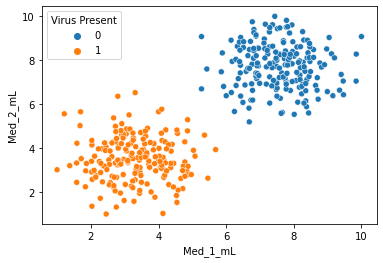

In [6]:
sns.scatterplot(data=df, x='Med_1_mL', y='Med_2_mL', hue='Virus Present');

 # Separating Hyperplane
 
 Our goal with SVM is to create the best separating hyperplane. In 2 dimensions, this is simply a line.

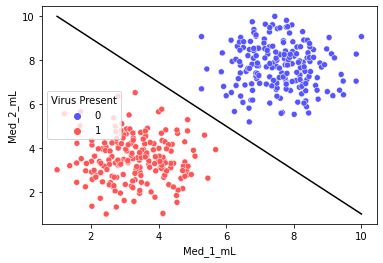

In [11]:
sns.scatterplot(data=df, x='Med_1_mL', y='Med_2_mL', hue='Virus Present', palette='seismic');

# HYPER PLANE (a line in 2D)
x = np.linspace(1, 10, 100)
m = -1 # negative slope
b = 11
y = m*x + b

plt.plot(x, y, color='black');

-----

# SVM - Support Vector Machine

In [12]:
from sklearn.svm import SVC

In [17]:
# help(SVC)

**NOTE: As we will foucs on algorithm, we won't do scaling or even train/test/split**

In [18]:
X = df.drop('Virus Present', axis=1)
y = df['Virus Present']

In [19]:
model = SVC(kernel='linear', C=1000)

In [21]:
model.fit(X, y)

SVC(C=1000, kernel='linear')

In [23]:
# py file from same folder location
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html

from svm_margin_plot import plot_svm_boundary

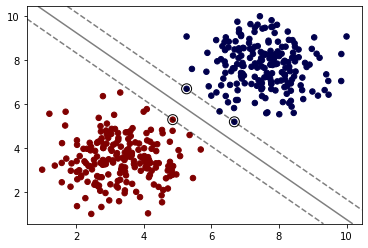

In [25]:
plot_svm_boundary(model, X, y)

------

# Hyper Parameters

# C parameter

- how many points you would allow to have in margins.

Regularization parameter. The strength of the regularization is **inversely proportional** to C value in equation. Must be strictly positive. The penalty is a squared L2 penalty.

In [26]:
# using small C value - means allowing many points
model = SVC(kernel='linear', C=0.05)

In [27]:
model.fit(X, y)

SVC(C=0.05, kernel='linear')

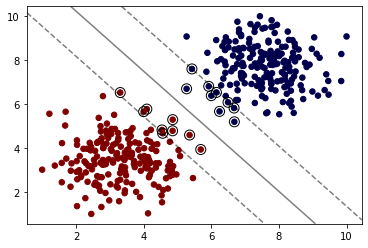

In [29]:
plot_svm_boundary(model, X, y)

**Now we can see that many points are allowed to have in the margin. (because of small C parameter value)**

------

# Kernel

## Radial basis function kernel

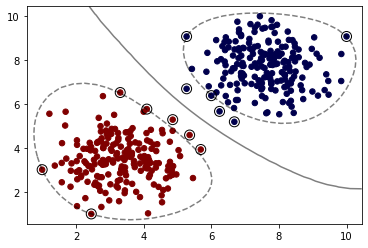

In [31]:
model = SVC(kernel='rbf', C=1)
model.fit(X, y)

plot_svm_boundary(model, X, y)

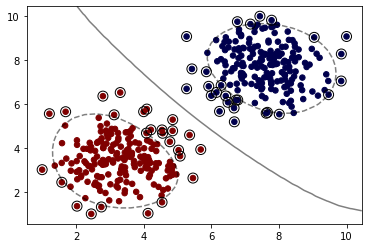

In [33]:
model = SVC(kernel='rbf', C=0.1)
model.fit(X, y)

plot_svm_boundary(model, X, y)

## gamma
- gamma defines how much influence a single training example has.
- meaning: gamma gets larger, the closer the other examples have to be in order to be affected.

gamma : {'scale', 'auto'} or float, default='scale' Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.

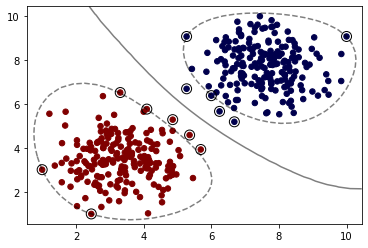

In [35]:
model = SVC(kernel='rbf', C=1, gamma='scale') # gamma : scale is default value
model.fit(X, y)

plot_svm_boundary(model, X, y)

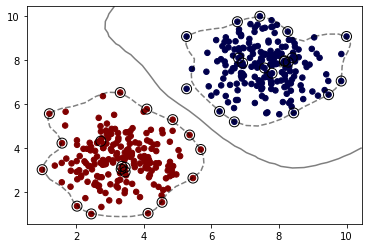

In [36]:
model = SVC(kernel='rbf', C=1, gamma='auto')
model.fit(X, y)

plot_svm_boundary(model, X, y)

As we can the larger the gamma value, it starts to fit more and more margin to Support Vectors points.

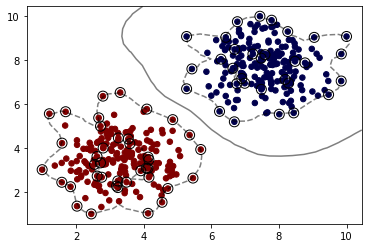

In [37]:
model = SVC(kernel='rbf', C=1, gamma=0.9)
model.fit(X, y)

plot_svm_boundary(model, X, y)

Now when gamma is too large, it became to overfit.

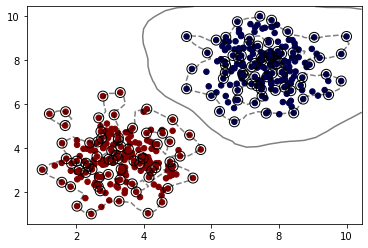

In [39]:
model = SVC(kernel='rbf', C=1, gamma=2)
model.fit(X, y)

plot_svm_boundary(model, X, y)

-----

## Sigmoid kernel

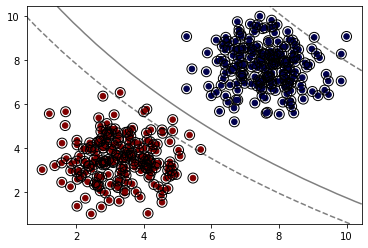

In [40]:
model = SVC(kernel='sigmoid')
model.fit(X, y)

plot_svm_boundary(model, X, y)

-----

# Polynomial Kernels

## Degree (poly kernels only)

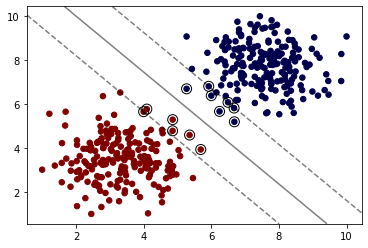

In [42]:
model = SVC(kernel='poly', degree=1)
model.fit(X, y)

plot_svm_boundary(model, X, y)

We can see the line starts to curve when the degree gets higher.

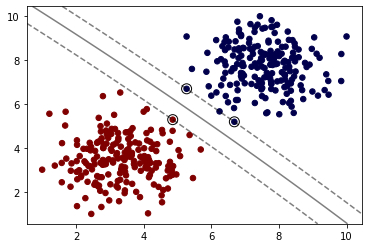

In [43]:
model = SVC(kernel='poly', degree=2)
model.fit(X, y)

plot_svm_boundary(model, X, y)

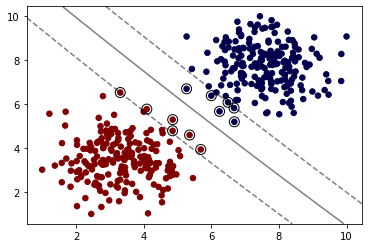

In [44]:
model = SVC(kernel='poly', degree=2, C=0.05)
model.fit(X, y)

plot_svm_boundary(model, X, y)

---
---

# Grid Search

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
svm = SVC()
parameters ={
    'C': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf'],
}

In [47]:
grid = GridSearchCV(svm, parameters)

In [54]:
# Note again we didn't split Train|Test
grid.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [55]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [56]:
grid.best_score_

1.0